<a href="https://colab.research.google.com/github/anu3200/Assignment/blob/main/Assignment_on_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Modules**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Loading the dataset**

In [3]:
data = pd.read_csv('/content/titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**statistical info**

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
## datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Exploratory Data Analysis**

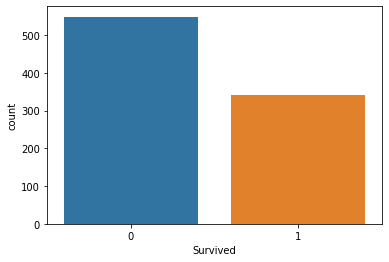

In [6]:
## categorical attributes
sns.countplot(data['Survived'])

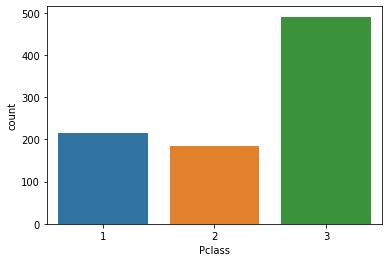

In [7]:
sns.countplot(data['Pclass'])

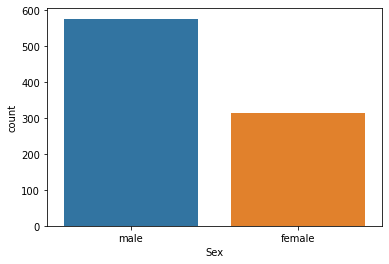

In [8]:
sns.countplot(data['Sex'])

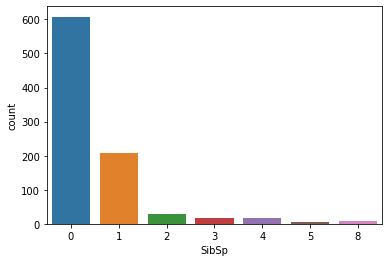

In [9]:
sns.countplot(data['SibSp'])

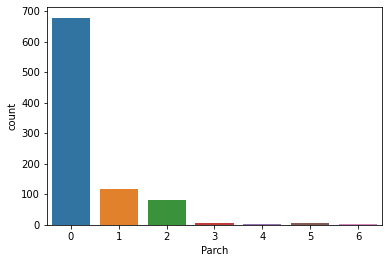

In [10]:
sns.countplot(data['Parch'])

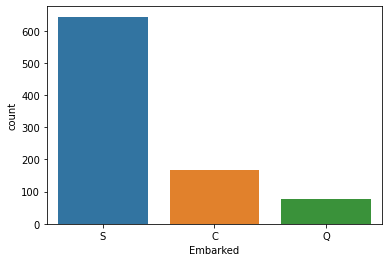

In [11]:
sns.countplot(data['Embarked'])

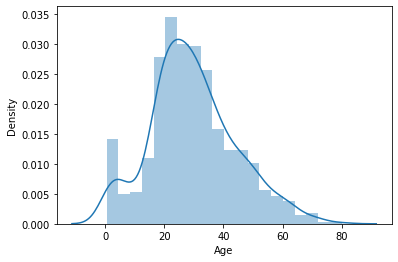

In [12]:
## numerical attributes
sns.distplot(data['Age'])

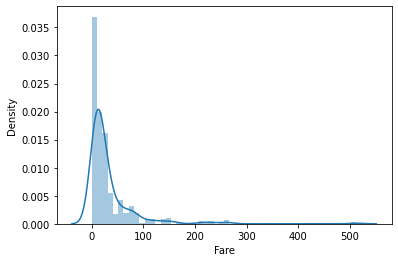

In [13]:
sns.distplot(data['Fare'])

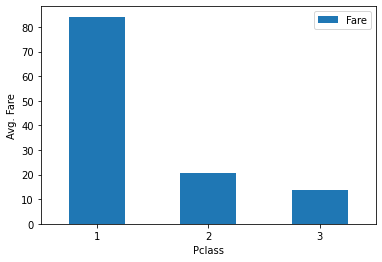

In [14]:
class_fare =data.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

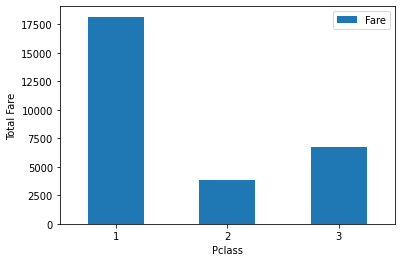

In [15]:
class_fare = data.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

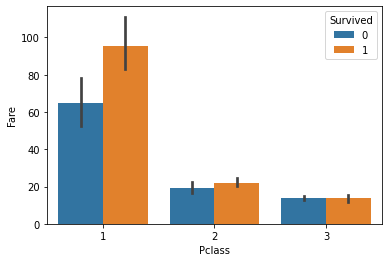

In [16]:
sns.barplot(data=data, x='Pclass', y='Fare', hue='Survived')

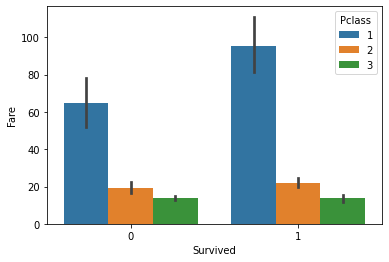

In [17]:
sns.barplot(data=data, x='Survived', y='Fare', hue='Pclass')

**Data Preprocessing**

In [18]:
## find the null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# drop or delete the column
df = data.drop(columns=['Cabin'], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [21]:
df['Age'].mean()

29.69911764705882

In [23]:
# fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [24]:
df['Embarked'].mode()[0]

'S'

In [25]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

**Log transformation for uniform data distribution**

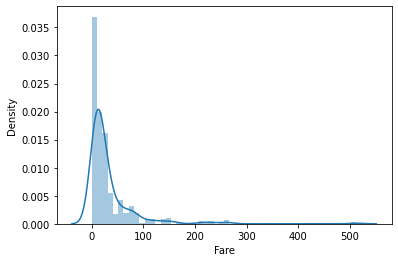

In [26]:
sns.distplot(df['Fare'])

In [27]:
df['Fare'] = np.log(df['Fare']+1)

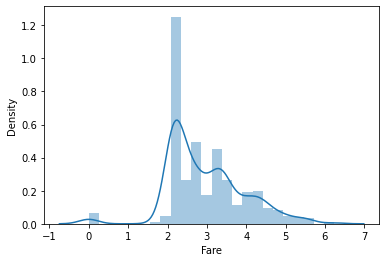

In [28]:
sns.distplot(df['Fare'])

**Correlation Matrix**

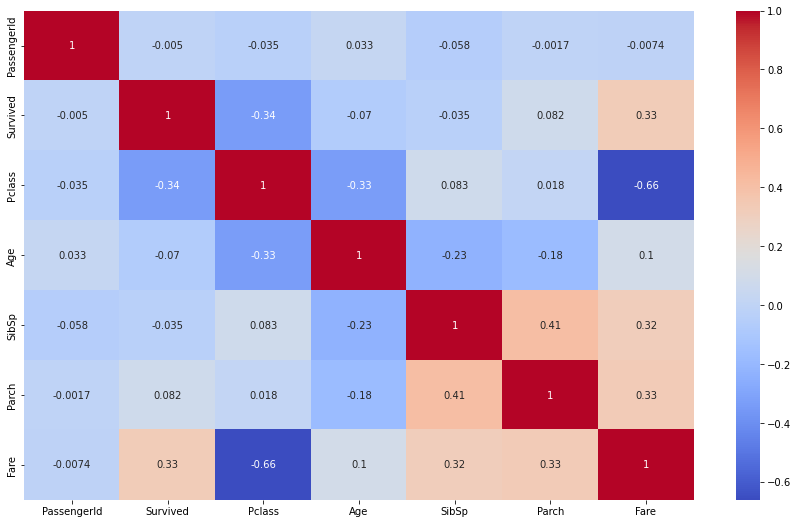

In [29]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [31]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,2.110213,S
1,2,1,1,female,38.0,1,0,4.280593,C
2,3,1,3,female,26.0,0,0,2.188856,S
3,4,1,1,female,35.0,1,0,3.990834,S
4,5,0,3,male,35.0,0,0,2.202765,S


**Label Encoding**

In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


**Model Training**

In [50]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['PassengerId', 'Survived'])
Y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [51]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [52]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [53]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  81.71641791044776


In [54]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [55]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [56]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  76.86567164179104


In [57]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [58]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [59]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  82.83582089552239


**SVM models**

In [85]:
import numpy as np
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn import svm

In [86]:
X, y = make_classification(n_samples=10, random_state=0)

In [87]:
 X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)

In [88]:
clf = svm.SVC(kernel='precomputed')

In [ ]:
# linear kernel computation

In [89]:
gram_train = np.dot(X_train, X_train.T)

In [90]:
clf.fit(gram_train, y_train)

SVC(kernel='precomputed')

In [ ]:
# predict on training examples

In [91]:
gram_test = np.dot(X_test, X_train.T)

In [92]:
 clf.predict(gram_test)

array([0, 1, 0])

 k-fold and stratified stratified k-fold cross validation techniques and find
the average accuracy score of the models 

In [60]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets

In [68]:
data = pd.read_csv('/content/titanic_dataset.csv')

In [71]:
# Input_x_Features.
x = df.drop(columns=['PassengerId', 'Survived'])
                     
 
# Input_ y_Target_Variable.
y = df['Survived']  

In [72]:
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [73]:
# Create  classifier object.
lr = linear_model.LogisticRegression()

In [74]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.7666666666666667, 0.8089887640449438, 0.7415730337078652, 0.8764044943820225, 0.7640449438202247, 0.8314606741573034, 0.7191011235955056, 0.797752808988764, 0.8651685393258427, 0.797752808988764]

Maximum Accuracy That can be obtained from this model is: 87.64044943820225 %

Minimum Accuracy: 71.91011235955057 %

Overall Accuracy: 79.68913857677903 %

Standard Deviation is: 0.051023782970050044
